In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
# **************** Load Data *********
data = pd.read_csv('/kaggle/input/movie-review-dataset/movie_review_analysis_dataset.csv')
print(data.head(10))

      ID Category        Date  Number of Reviews  Average Rating (1-10)  \
0   ID_1   Type D  2018-01-01                706                  20.07   
1   ID_2   Type B  2018-01-02                591                 321.81   
2   ID_3   Type B  2018-01-03                919                 211.47   
3   ID_4   Type C  2018-01-04                418                  61.03   
4   ID_5   Type D  2018-01-05                759                 168.66   
5   ID_6   Type C  2018-01-06                298                 268.24   
6   ID_7   Type D  2018-01-07                535                  29.25   
7   ID_8   Type C  2018-01-08                417                 113.84   
8   ID_9   Type A  2018-01-09                451                  34.74   
9  ID_10   Type D  2018-01-10                456                 402.14   

      Label  
0  Positive  
1  Negative  
2  Positive  
3  Positive  
4   Neutral  
5   Neutral  
6  Negative  
7  Positive  
8  Negative  
9  Positive  


In [8]:
# Clean the data
data = data.dropna()
print(data.isnull().sum())

#  Convert 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

ID                       0
Category                 0
Date                     0
Number of Reviews        0
Average Rating (1-10)    0
Label                    0
dtype: int64


In [12]:
# ************* Explore the data ************

# 1. Basic information of Dataset
print("------------- Basic information -----------")
print(data.info())

# 2. Get a summary of the data
print("----------- summary of the data --------------")
print(data.describe())

#  3. chack for missing values
print("----------- chack missing values -------------")
print(data.isnull().sum())

#  4. Unique values in lable & category columns
print("------------ Unique values by column------------")
print("Unique labels : ", data["Label"].unique())
print("Unique Categorys : ", data["Category"].unique())
print("-------------------------")

#  5. Average Rating
average_rating = data['Average Rating (1-10)'].mean()
print(f"Average Rating: {average_rating}")
print("-------------------------")

# 6. Total Number of Reviews
total_reviews = data["Number of Reviews"].sum()
print(f"Total Number of Reviews : {total_reviews}")

------------- Basic information -----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     1000 non-null   object        
 1   Category               1000 non-null   object        
 2   Date                   1000 non-null   datetime64[ns]
 3   Number of Reviews      1000 non-null   int64         
 4   Average Rating (1-10)  1000 non-null   float64       
 5   Label                  1000 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 47.0+ KB
None
----------- summary of the data --------------
                      Date  Number of Reviews  Average Rating (1-10)
count                 1000        1000.000000            1000.000000
mean   2019-05-15 12:00:00         500.504000             252.356740
min    2018-01-01 00:00:00           1

In [14]:
# ************* Group by category and lable ***************

#  7. Total Number_of_Visits by category
total_Number_of_Reviews = data.groupby('Category')['Number of Reviews'].sum()
print(total_Number_of_Reviews)

# 8. Manimum Reviews by lable
manimum_Reviews = data.groupby('Label')['Number of Reviews'].min()
print(manimum_Reviews)
print("-------------------------")

# 9. Avg Medical Costs by category
avg_ratings = data.groupby('Category')['Average Rating (1-10)'].mean()
print(avg_ratings)

Category
Type A    116382
Type B    136472
Type C    125353
Type D    122297
Name: Number of Reviews, dtype: int64
Label
Negative    1
Neutral     9
Positive    4
Name: Number of Reviews, dtype: int64
-------------------------
Category
Type A    233.739336
Type B    259.803488
Type C    256.432099
Type D    258.462248
Name: Average Rating (1-10), dtype: float64


In [15]:
#  10. Monthly Number_of_Reviews
data['Month'] = data['Date'].dt.month
monthly_Reviews = data.groupby('Month')['Number of Reviews'].sum()
print(monthly_Reviews)

Month
1     49024
2     37803
3     43488
4     44511
5     44715
6     50109
7     47694
8     47398
9     41765
10    28580
11    30293
12    35124
Name: Number of Reviews, dtype: int64


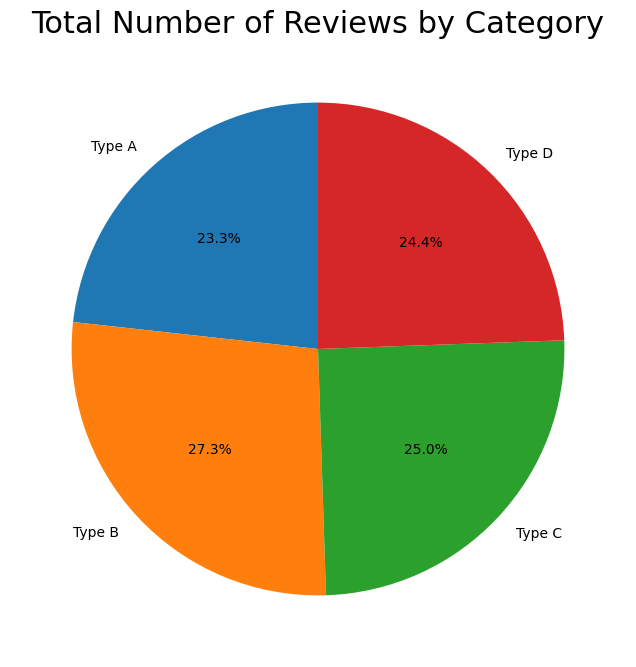

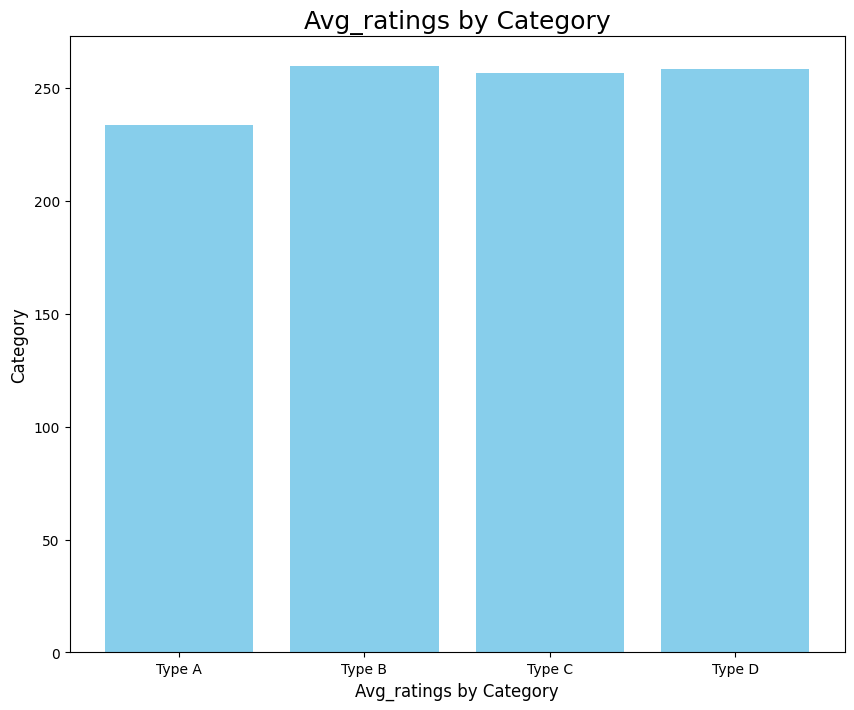

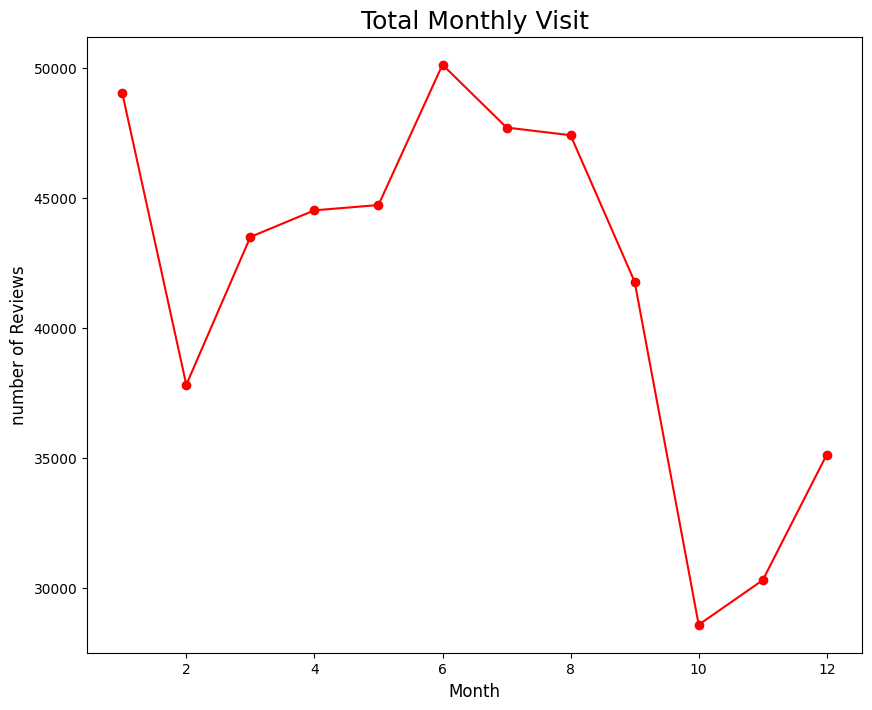

In [16]:
# Visualization

# 1. Pie chart ---->
plt.figure(figsize=(10, 8))
plt.pie(total_Number_of_Reviews.values, labels=total_Number_of_Reviews.index, autopct='%1.1f%%', startangle=90)
plt.title("Total Number of Reviews by Category", fontsize=22)
plt.show()

# 2. bar chart ----> 
plt.figure(figsize=(10, 8))
plt.bar(avg_ratings.index, avg_ratings.values, color='skyBlue')
plt.title("Avg_ratings by Category", fontsize=18)
plt.xlabel("Avg_ratings by Category", fontsize=12)
plt.ylabel("Category", fontsize=12)
plt.show()

# 3. plot chart ------>
plt.figure(figsize=(10, 8))
plt.plot(monthly_Reviews.index, monthly_Reviews.values, marker='o', color='red')
plt.title("Total Monthly Visit", fontsize=18)
plt.xlabel("Month", fontsize=12)
plt.ylabel("number of Reviews", fontsize=12)
plt.show()